<a href="https://colab.research.google.com/github/obhalerao/bwsi-rs-final-logistics/blob/master/final_exercise_grid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# need to specify location of some certificates for rasterio
!export CURL_CA_BUNDLE=/etc/ssl/certs/ca-certificates.crt
!sudo mkdir -p /etc/pki/tls/certs
!sudo cp /etc/ssl/certs/ca-certificates.crt /etc/pki/tls/certs/ca-bundle.crt
try:
  import rasterio
  import rasterio.plot
  import rasterio.merge 
  import rasterio.mask
except:
  !pip install rasterio
  import rasterio
  import rasterio.plot
  import rasterio.merge
  import rasterio.mask
  
try:
  import rasterstats as rs
except:
  !pip install rasterstats  
  import rasterstats as rs
  
try:
  import pyproj
except:
  !pip install pyproj
  import pyproj
  
import networkx as nx
try:
  import osmnx as ox
except:
  # osmnx depends on the system package libspatialindex
  !apt install libspatialindex-dev
  !pip install osmnx
  import osmnx as ox

try: 
  import geopandas as gpd
except: 
  !pip install geopandas 
  import geopandas as gpd
  
try:
  import contextily as ctx 
except:
  # install dependencies for contextily
  !apt install libproj-dev proj-data proj-bin
  !apt install libgeos-dev
  !pip install cython
  !pip install cartopy
  # install contextily
  !pip install contextily==1.0rc1 --no-use-pep517 --no-cache-dir
  import contextily as ctx
  
import fiona
from shapely.geometry import Point, LineString, Polygon
  
import gdal
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pathlib
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/'My Drive'/BWSI-Remote-Sensing/'Final_exercise'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/BWSI-Remote-Sensing/Final_exercise


In [4]:
!ls game_grid_export

facilities    flooding.prj  game_grid_all_stats.cpg  game_grid_all_stats.shp
flooding.cpg  flooding.shp  game_grid_all_stats.dbf  game_grid_all_stats.shx
flooding.dbf  flooding.shx  game_grid_all_stats.prj


In [9]:
game_grid = gpd.read_file('game_grid_export/game_grid_all_stats.shp')
game_grid

,MGRS,kmSQ_ID,GZD,EASTING,NORTHING,MGRS_10km,Shape_Leng,Shape_Le_1,Shape_Area,x_centroid,y_centroid,elevation,population,Health,Utility,Transporta,geometry
0,19TBH7264,BH,19T,272000mE,4764000mN,19TBH76,0.042522,0.042522,0.000110,-71.791007,42.999142,212.583814,9,10,7,3,POLYGON ((-71.78467719839398 42.99479431440608...
1,19TBH7364,BH,19T,273000mE,4764000mN,19TBH76,0.042523,0.042523,0.000110,-71.778753,42.999441,177.675009,7,10,7,3,POLYGON ((-71.77242397328774 42.99509199899654...
2,19TBH7464,BH,19T,274000mE,4764000mN,19TBH76,0.042523,0.042523,0.000110,-71.766499,42.999738,156.523842,10,10,7,3,POLYGON ((-71.76017056202181 42.99538837417413...
3,19TBH7564,BH,19T,275000mE,4764000mN,19TBH76,0.042523,0.042523,0.000110,-71.754245,43.000033,138.588531,14,10,7,3,POLYGON ((-71.74791696549556 42.99568343903945...
4,19TBH7664,BH,19T,276000mE,4764000mN,19TBH76,0.042524,0.042524,0.000110,-71.741990,43.000328,122.465957,20,10,7,3,POLYGON ((-71.73566318460826 42.99597719359258...
5,19TBH7764,BH,19T,277000mE,4764000mN,19TBH76,0.042524,0.042524,0.000110,-71.729735,43.000621,106.114289,10,10,7,3,POLYGON ((-71.72340921935995 42.99626963783351...
6,19TBH7864,BH,19T,278000mE,4764000mN,19TBH76,0.042524,0.042524,0.000110,-71.717481,43.000913,99.796777,15,10,7,3,POLYGON ((-71.71115507154929 42.99656077176218...
7,19TBH7964,BH,19T,279000mE,4764000mN,19TBH76,0.042525,0.042525,0.000110,-71.705225,43.001203,101.406042,12,10,7,3,POLYGON ((-71.69890074117626 42.99685059537865...
8,19TBH8064,BH,19T,280000mE,4764000mN,19TBH86,0.042525,0.042525,0.000110,-71.692970,43.001493,85.555283,29,10,7,3,"POLYGON ((-71.68664623003946 42.9971391077836,..."
9,19TBH8164,BH,19T,281000mE,4764000mN,19TBH86,0.042525,0.042525,0.000110,-71.680715,43.001780,80.061538,27,10,7,3,POLYGON ((-71.67439153903831 42.99742631077561...


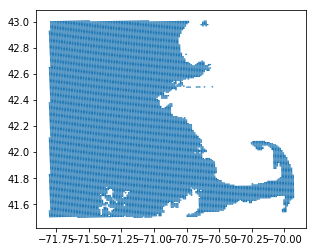

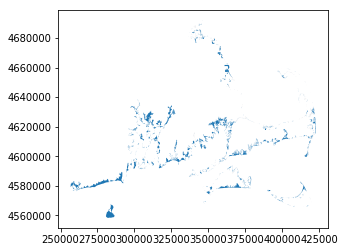

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax2 = game_grid.plot(ax=ax)